<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Regression - Final Assignment</font></h1>


# Library Import

In [14]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Dataset Import

* Name: Song Popularity Dataset
* Source: kaggle
* Url: https://www.kaggle.com/datasets/yasserh/song-popularity-dataset

Humans have greatly associated themselves with Songs & Music. It can improve mood, decrease pain and anxiety, and facilitate opportunities for emotional expression. Research suggests that music can benefit our physical and mental health in numerous ways.

Lately, multiple studies have been carried out to understand songs & it's popularity based on certain factors. Such song samples are broken down & their parameters are recorded to tabulate. Predicting the Song Popularity is the main aim.

The project is simple yet challenging, to predict the song popularity based on energy, acoustics, instumentalness, liveness, dancibility, etc. The dataset is large & it's complexity arises due to the fact that it has strong multicollinearity. Can you overcome these obstacles & build a decent predictive model?

In [15]:
song_df = pd.read_csv('song_data.csv')
song_df.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


# 1. About the data

The goal of the dataset is to predict the popularity of a song based on qualitative and quantitative characteristics of the song, so song_popularity will be used as the y_column.

In [16]:
Y_COLUMN = 'song_popularity'

## 1.1 missing data and preprocessing

Goal of this section is to perform a general analysis of the dataset, including checks for NA and / or valid data types.

In [17]:
song_df.isna().sum()

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

In [18]:
song_df.dtypes

song_name            object
song_popularity       int64
song_duration_ms      int64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
audio_mode            int64
speechiness         float64
tempo               float64
time_signature        int64
audio_valence       float64
dtype: object

All of the dtypes are in line with what is expected, with song name being strings, and the rest being int64 or float64 values.

## 1.2 song_popularity data distribution

Will do a quick analysis of the song_popularity column, which represents the y value of the regression.

In [23]:
song_popularity = song_df[Y_COLUMN]

In [25]:
song_popularity.describe()

count    18835.000000
mean        52.991877
std         21.905654
min          0.000000
25%         40.000000
50%         56.000000
75%         69.000000
max        100.000000
Name: song_popularity, dtype: float64

<Axes: xlabel='song_popularity', ylabel='Count'>

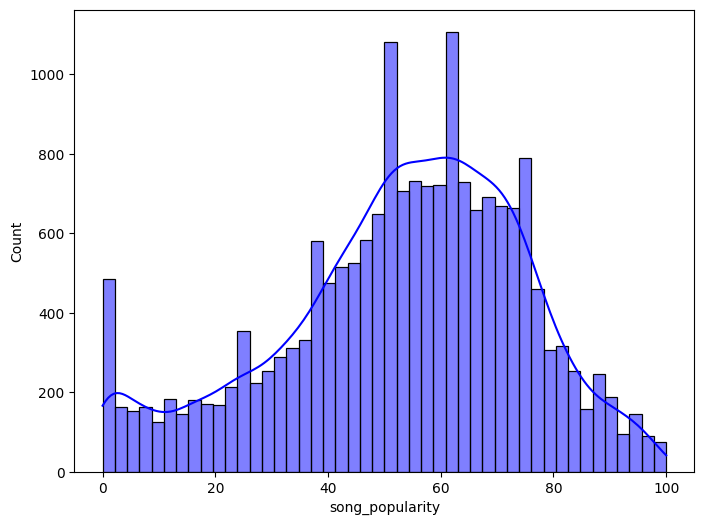

In [24]:
plt.figure(figsize=(8, 6))
sb.histplot(song_popularity, color='b', kde=True)

The above distribution indicates a slight negative skew to the song_popularity, which a larger proportion of datapoints being over the 50% threshold of song popularity.

## 1.3 Data analysis

Now I am going to analysis the rest of the dataset excluding song_popularity (which is the y axis), as well as song_name, as this isn't relevant in the regression.

In [26]:
cur_X = song_df.drop([Y_COLUMN, 'song_name'], axis=1)
cur_X

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
18831,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
18832,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286
18833,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323


In [ ]:
cur_X.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)